<a href="https://colab.research.google.com/github/adamgrzanek/Genetic_disorders/blob/main/projekt_ag__Genomes_And_Genetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/datasets/aryarishabh/of-genomes-and-genetics-hackerearth-ml-challenge

In [ ]:
import numpy as np
import pandas as pd

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [ ]:
pd.set_option('display.max_columns', 50)

In [ ]:
!unzip -q Of_Genomes_And_Genetics.zip

In [ ]:
ls

Of_Genomes_And_Genetics.zip  sample_submission.csv  train.csv
sample_data/                 test.csv


# Check sample_submission and test files

In [ ]:
ss_df = pd.read_csv('sample_submission.csv')
ss_df

,Patient Id,Genetic Disorder,Disorder Subclass
0,PID0x6418,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,Single-gene inheritance diseases,Cystic fibrosis
2,PID0x4a82,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,Multifactorial genetic inheritance disorders,Cancer


In [ ]:
test_df = pd.read_csv('test.csv')
test_df

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,6,No,Yes,No,No,4.981655,Charles,NaN,Kore,38,61,St. Elizabeth's Hospital,"30 WARREN ST\nALLSTON/BRIGHTON, MA 02134\n(42....",Alive,Tachypnea,Normal,0,-99,0,1,0,-99,Low,Male,Yes,Not applicable,Institute,Yes,No,Yes,-,No,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,10,Yes,No,NaN,Yes,5.118890,Catherine,NaN,Homero,33,53,-99,"249 RIVER ST\nMATTAPAN, MA 02126\n(42.27137912...",Alive,NaN,-99,0,0,-99,1,-99,Yes,Low,Male,Yes,Not applicable,-99,Yes,No,-99,-99,No,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,5,No,NaN,No,No,4.876204,James,NaN,Danield,48,60,NaN,"1400 VFW Parkway\nWest Roxbury, MA 02132\n(42....",Deceased,NaN,Normal,0,0,0,1,0,-99,Low,Ambiguous,Not available,-99,Institute,No,Yes,Yes,Yes,Yes,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,13,No,Yes,Yes,No,4.687767,Brian,NaN,Orville,25,55,Boston Specialty & Rehabilitation Hospital,"51 BLOSSOM ST\nCENTRAL, MA 02114\n(42.36327718...",Alive,-99,-99,0,0,0,1,0,-99,Low,Ambiguous,No,Not applicable,-99,Yes,Yes,-,-99,-99,Yes,-99,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,5,No,NaN,NaN,Yes,5.152362,Gary,NaN,Issiah,41,38,Not applicable,-,Deceased,Tachypnea,NaN,0,0,0,1,0,Yes,Low,Ambiguous,No,None,Home,Yes,Yes,Yes,Not applicable,No,No,-99,Multiple,6.195178,normal,True,True,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9460,PID0x81e1,9,Yes,Yes,NaN,No,4.878335,Francisco,NaN,Artavian,28,63,NaN,"51 BLOSSOM ST\nCENTRAL, MA 02114\n(42.36327718...",Alive,-99,NaN,-99,0,-99,1,-99,Yes,Low,-99,No,Not applicable,Institute,Yes,-99,-99,-99,No,Yes,2,Multiple,7.234960,abnormal,False,True,True,True,False
9461,PID0x3514,1,Yes,No,NaN,Yes,4.927151,James,NaN,Nasir,37,62,-99,"125 NASHUA ST\nCENTRAL, MA 02114\n(42.36764789...",Deceased,-99,-99,0,0,-99,1,-99,Yes,-99,Male,Yes,None,Institute,-99,No,Yes,Yes,-99,No,-99,Singular,4.859536,abnormal,False,True,False,True,True
9462,PID0x5408,2,No,Yes,No,No,4.898352,Rebecca,NaN,Jatorian,24,32,St. Margaret's Hospital For Women,"170 MORTON ST\nROSLINDALE, MA 02130\n(42.30025...",Deceased,Tachypnea,Tachycardia,-99,0,0,1,0,Yes,-99,Female,Not available,Yes,Institute,Yes,-99,Not applicable,Yes,No,No,3,-99,5.696062,normal,False,True,False,False,True
9463,PID0x2017,13,No,Yes,No,No,4.804840,Daryl,NaN,Keevis,36,56,-99,-,Alive,NaN,Normal,0,0,0,1,0,Yes,High,-99,Yes,Not applicable,Home,Yes,-99,No,No,Yes,-99,1,Singular,3.000000,inconclusive,True,True,True,True,True


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9465 entries, 0 to 9464
Data columns (total 43 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        9465 non-null   object 
 1   Patient Age                                       9465 non-null   int64  
 2   Genes in mother's side                            9465 non-null   object 
 3   Inherited from father                             8914 non-null   object 
 4   Maternal gene                                     5742 non-null   object 
 5   Paternal gene                                     9465 non-null   object 
 6   Blood cell count (mcL)                            9465 non-null   float64
 7   Patient First Name                                9465 non-null   object 
 8   Family Name                                       148 non-null    object 
 9   Father's name      

In [ ]:
test_df.describe()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,Test 1,Test 2,Test 3,Test 4,Test 5,No. of previous abortion,White Blood cell count (thousand per microliter)
count,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000,9465.000000
mean,7.041838,4.900207,34.575489,41.830745,-22.174326,-21.766403,-21.954675,-20.996830,-21.870998,-20.352879,-16.155621
std,4.337995,0.199159,9.834870,13.040945,41.276356,41.003356,41.130084,41.424676,41.073915,41.965045,44.328480
min,0.000000,4.120469,18.000000,20.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000
25%,3.000000,4.765843,26.000000,30.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.000000
50%,7.000000,4.898950,35.000000,42.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,6.359714
75%,11.000000,5.033164,43.000000,53.000000,0.000000,0.000000,0.000000,1.000000,0.000000,3.000000,8.896115
max,14.000000,5.676184,51.000000,64.000000,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,12.000000


In [ ]:
test_df['Test 1'].value_counts()

 0     7345
-99    2120
Name: Test 1, dtype: int64

In [ ]:
test_df.columns

Index(['Patient Id', 'Patient Age', 'Genes in mother's side',
       'Inherited from father', 'Maternal gene', 'Paternal gene',
       'Blood cell count (mcL)', 'Patient First Name', 'Family Name',
       'Father's name', 'Mother's age', 'Father's age', 'Institute Name',
       'Location of Institute', 'Status', 'Respiratory Rate (breaths/min)',
       'Heart Rate (rates/min', 'Test 1', 'Test 2', 'Test 3', 'Test 4',
       'Test 5', 'Parental consent', 'Follow-up', 'Gender', 'Birth asphyxia',
       'Autopsy shows birth defect (if applicable)', 'Place of birth',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'History of anomalies in previous pregnancies',
       'No. of previous abortion', 'Birth defects',
       'White Blood cell count (thousand per microliter)', 'Blood test result',
       'Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'S

# Train file
target -> Disorder Subclass

In [ ]:
train_df = pd.read_csv('train.csv')
train_df.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,None,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,21.0,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,Yes,High,Male,Not available,No,Institute,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


### Preprocessing - part I

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

In [ ]:
# auxiliary dataframe
aux_df = train_df.describe().T
aux_df

,count,mean,std,min,25%,50%,75%,max
Patient Age,20656.0,6.974148,4.319475,0.000000,3.000000,7.000000,11.000000,14.000000
Blood cell count (mcL),22083.0,4.898871,0.199663,4.092727,4.763109,4.899399,5.033830,5.609829
Mother's age,16047.0,34.526454,9.852598,18.000000,26.000000,35.000000,43.000000,51.000000
Father's age,16097.0,41.972852,13.035501,20.000000,31.000000,42.000000,53.000000,64.000000
Test 1,19956.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Test 2,19931.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Test 3,19936.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Test 4,19943.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Test 5,19913.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
No. of previous abortion,19921.0,2.003062,1.411919,0.000000,1.000000,2.000000,3.000000,4.000000


In [ ]:
cols_std_zero = list(aux_df[aux_df['std'] == 0].index)
cols_std_zero

['Test 1', 'Test 2', 'Test 3', 'Test 4', 'Test 5']

In [ ]:
train_df.describe(include='object').T

,count,unique,top,freq
Patient Id,22083,22083,PID0x6418,1
Genes in mother's side,22083,2,Yes,13143
Inherited from father,21777,2,No,13133
Maternal gene,19273,2,Yes,10647
Paternal gene,22083,2,No,12508
Patient First Name,22083,2524,James,420
Family Name,12392,6282,Smith,157
Father's name,22083,16368,Clardie,6
Institute Name,16977,27,Not applicable,8440
Location of Institute,22083,26,-,10931


In [ ]:
cols_large_num_of_uniques = list(train_df.describe(include='object').T.query('unique > 10').index)
cols_large_num_of_uniques

['Patient Id',
 'Patient First Name',
 'Family Name',
 "Father's name",
 'Institute Name',
 'Location of Institute']

In [ ]:
train_df.describe(include='object').T.query('unique == 1')

,count,unique,top,freq
Parental consent,19958,1,Yes,19958


In [ ]:
cols_to_del = cols_std_zero + cols_large_num_of_uniques + ['Parental consent'] 
cols_to_del

['Test 1',
 'Test 2',
 'Test 3',
 'Test 4',
 'Test 5',
 'Patient Id',
 'Patient First Name',
 'Family Name',
 "Father's name",
 'Institute Name',
 'Location of Institute',
 'Parental consent']

In [ ]:
# removing redundant columns
train_df.drop(columns=cols_to_del, inplace=True)

train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 33 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       20656 non-null  float64
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             21777 non-null  object 
 3   Maternal gene                                     19273 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      16047 non-null  float64
 7   Father's age                                      16097 non-null  float64
 8   Status                                            22083 non-null  object 
 9   Respiratory Rate 

In [ ]:
train_df.describe(include='object').T

,count,unique,top,freq
Genes in mother's side,22083,2,Yes,13143
Inherited from father,21777,2,No,13133
Maternal gene,19273,2,Yes,10647
Paternal gene,22083,2,No,12508
Status,22083,2,Alive,11083
Respiratory Rate (breaths/min),19934,2,Normal (30-60),10065
Heart Rate (rates/min,19970,2,Normal,10187
Follow-up,19917,2,Low,10040
Gender,19910,3,Ambiguous,6695
Birth asphyxia,19944,4,Yes,5106


In [ ]:
# Check unique values for each columns
for col in train_df.columns:
    if train_df[col].dtypes == 'object':
        print(f'Column: {col}')
        print(f'Unique values: {train_df[col].unique()}')
        #print(train_df[col].value_counts())
        print('*' * 40)
        print('\n')

Column: Genes in mother's side
Unique values: ['Yes' 'No']
****************************************


Column: Inherited from father
Unique values: ['No' 'Yes' nan]
****************************************


Column: Maternal gene
Unique values: ['Yes' 'No' nan]
****************************************


Column: Paternal gene
Unique values: ['No' 'Yes']
****************************************


Column: Status
Unique values: ['Alive' 'Deceased']
****************************************


Column: Respiratory Rate (breaths/min)
Unique values: ['Normal (30-60)' 'Tachypnea' nan]
****************************************


Column: Heart Rate (rates/min
Unique values: ['Normal' 'Tachycardia' nan]
****************************************


Column: Follow-up
Unique values: ['High' 'Low' nan]
****************************************


Column: Gender
Unique values: [nan 'Male' 'Female' 'Ambiguous']
****************************************


Column: Birth asphyxia
Unique values: [nan 'No' 'No record

In [ ]:
# Replace wrong values

# Column: Birth asphyxia
# Unique values: [nan 'No' 'No record' 'Not available' 'Yes']
train_df['Birth asphyxia'].replace('No record', np.nan, inplace=True)

# Column: Autopsy shows birth defect (if applicable)
# Unique values: ['Not applicable' 'None' 'No' 'Yes' nan]
train_df['Autopsy shows birth defect (if applicable)'].replace('None', np.nan, inplace=True)

# Column: H/O radiation exposure (x-ray)
# Unique values: ['No' 'Not applicable' 'Yes' '-' nan]
train_df['H/O radiation exposure (x-ray)'].replace('-', np.nan, inplace=True)

# Column: H/O substance abuse
# Unique values: ['No' 'Not applicable' nan '-' 'Yes']
train_df['H/O substance abuse'].replace('-', np.nan, inplace=True)

In [ ]:
# Delete rows without target
train_df.dropna(axis=0, subset=['Disorder Subclass'], inplace=True)

In [ ]:
# Preparation for standardization
num_col = [col for col in train_df if train_df[col].dtypes in ['int', 'float']]
num_col

['Patient Age',
 'Blood cell count (mcL)',
 "Mother's age",
 "Father's age",
 'No. of previous abortion',
 'White Blood cell count (thousand per microliter)',
 'Symptom 1',
 'Symptom 2',
 'Symptom 3',
 'Symptom 4',
 'Symptom 5']

In [ ]:
bin_col = [col for col in num_col if sorted(list(train_df[col].value_counts().index)) == [0, 1]]
bin_col

['Symptom 1', 'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5']

In [ ]:
col_to_standardized = num_col.copy()
col_to_standardized

['Patient Age',
 'Blood cell count (mcL)',
 "Mother's age",
 "Father's age",
 'No. of previous abortion',
 'White Blood cell count (thousand per microliter)',
 'Symptom 1',
 'Symptom 2',
 'Symptom 3',
 'Symptom 4',
 'Symptom 5']

In [ ]:
for i in bin_col:
    col_to_standardized.remove(i)

col_to_standardized

['Patient Age',
 'Blood cell count (mcL)',
 "Mother's age",
 "Father's age",
 'No. of previous abortion',
 'White Blood cell count (thousand per microliter)']

### Data exploration

In [ ]:
len(train_df[train_df.duplicated()])

0

In [ ]:
# Missing values in each column
train_df.isnull().sum()

Patient Age                                         1243
Genes in mother's side                                 0
Inherited from father                                263
Maternal gene                                       2405
Paternal gene                                          0
Blood cell count (mcL)                                 0
Mother's age                                        5196
Father's age                                        5119
Status                                                 0
Respiratory Rate (breaths/min)                      1857
Heart Rate (rates/min                               1788
Follow-up                                           1845
Gender                                              1863
Birth asphyxia                                      6339
Autopsy shows birth defect (if applicable)          3958
Place of birth                                      1855
Folic acid details (peri-conceptional)              1823
H/O serious maternal illness   

In [ ]:
train_df['Place of birth'].value_counts()

Institute    9130
Home         8930
Name: Place of birth, dtype: int64

<AxesSubplot:ylabel='Patient Age'>

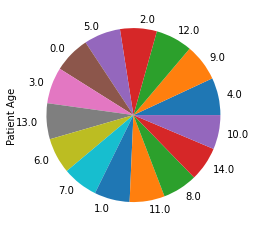

In [ ]:
train_df['Patient Age'].value_counts().plot(kind='pie')

In [ ]:
train_df['Gender'].value_counts()#.plot(kind='pie')

Male         6050
Ambiguous    6044
Female       5958
Name: Gender, dtype: int64

In [ ]:
train_df['Genetic Disorder'].value_counts()

Mitochondrial genetic inheritance disorders     9241
Single-gene inheritance diseases                6929
Multifactorial genetic inheritance disorders    1877
Name: Genetic Disorder, dtype: int64

In [ ]:
train_df['Disorder Subclass'].value_counts()

Leigh syndrome                         5160
Mitochondrial myopathy                 4405
Cystic fibrosis                        3448
Tay-Sachs                              2833
Diabetes                               1817
Hemochromatosis                        1355
Leber's hereditary optic neuropathy     648
Alzheimer's                             152
Cancer                                   97
Name: Disorder Subclass, dtype: int64

<AxesSubplot:ylabel='Disorder Subclass'>

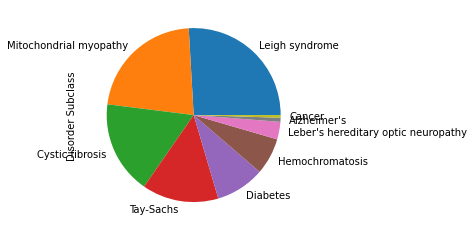

In [ ]:
train_df['Disorder Subclass'].value_counts().plot(kind='pie')

# v1 - Delete all rows with missing values

### df_1

In [ ]:
# drop all rows with missing values
df_1 = train_df.dropna()
df_1

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
8,11.0,No,No,Yes,No,5.209058,45.0,44.0,Alive,Tachypnea,Tachycardia,Low,Male,Yes,Not applicable,Institute,Yes,Yes,No,No,No,Yes,0.0,Multiple,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
9,4.0,No,Yes,Yes,Yes,4.752272,44.0,42.0,Alive,Tachypnea,Tachycardia,Low,Male,No,Not applicable,Institute,Yes,No,No,No,Yes,Yes,1.0,Multiple,6.397702,abnormal,0.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
18,10.0,Yes,Yes,Yes,No,4.751452,40.0,57.0,Deceased,Normal (30-60),Tachycardia,Low,Ambiguous,No,Yes,Institute,No,No,Yes,No,Yes,Yes,3.0,Singular,9.382407,abnormal,1.0,1.0,0.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
19,6.0,No,Yes,Yes,Yes,4.876896,36.0,48.0,Deceased,Tachypnea,Normal,Low,Ambiguous,No,Yes,Institute,Yes,Yes,No,No,Yes,No,1.0,Singular,7.370477,normal,1.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,Hemochromatosis
32,1.0,Yes,Yes,No,Yes,4.969060,38.0,61.0,Deceased,Normal (30-60),Tachycardia,Low,Male,Not available,No,Home,No,Yes,Not applicable,Not applicable,No,Yes,4.0,Multiple,9.770317,inconclusive,0.0,1.0,0.0,1.0,0.0,Single-gene inheritance diseases,Tay-Sachs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22012,11.0,No,No,Yes,No,5.104406,43.0,24.0,Deceased,Normal (30-60),Tachycardia,High,Male,No,No,Institute,Yes,No,Not applicable,Not applicable,No,No,2.0,Multiple,4.847442,abnormal,1.0,1.0,0.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22020,10.0,Yes,No,No,Yes,4.815370,43.0,63.0,Deceased,Normal (30-60),Tachycardia,Low,Male,Not available,Yes,Institute,Yes,No,Not applicable,Yes,Yes,Yes,3.0,Singular,4.055816,normal,1.0,1.0,1.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis
22050,14.0,No,No,No,No,5.056440,35.0,37.0,Deceased,Tachypnea,Tachycardia,Low,Ambiguous,No,Yes,Home,No,No,Not applicable,Not applicable,Yes,No,4.0,Singular,8.992224,abnormal,1.0,1.0,1.0,0.0,0.0,Single-gene inheritance diseases,Tay-Sachs
22057,6.0,No,Yes,No,Yes,5.117296,48.0,27.0,Alive,Tachypnea,Tachycardia,High,Male,No,Not applicable,Institute,Yes,No,No,Not applicable,No,Yes,3.0,Singular,3.453291,slightly abnormal,0.0,0.0,1.0,1.0,0.0,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2392 entries, 8 to 22068
Data columns (total 33 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       2392 non-null   float64
 1   Genes in mother's side                            2392 non-null   object 
 2   Inherited from father                             2392 non-null   object 
 3   Maternal gene                                     2392 non-null   object 
 4   Paternal gene                                     2392 non-null   object 
 5   Blood cell count (mcL)                            2392 non-null   float64
 6   Mother's age                                      2392 non-null   float64
 7   Father's age                                      2392 non-null   float64
 8   Status                                            2392 non-null   object 
 9   Respiratory Rate (

In [ ]:
# Encode target label
# from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_1['Disorder Subclass'] = le.fit_transform(df_1['Disorder Subclass'])

In [ ]:
df_1.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
8,11.0,No,No,Yes,No,5.209058,45.0,44.0,Alive,Tachypnea,Tachycardia,Low,Male,Yes,Not applicable,Institute,Yes,Yes,No,No,No,Yes,0.0,Multiple,6.669552,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,6
9,4.0,No,Yes,Yes,Yes,4.752272,44.0,42.0,Alive,Tachypnea,Tachycardia,Low,Male,No,Not applicable,Institute,Yes,No,No,No,Yes,Yes,1.0,Multiple,6.397702,abnormal,0.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,3
18,10.0,Yes,Yes,Yes,No,4.751452,40.0,57.0,Deceased,Normal (30-60),Tachycardia,Low,Ambiguous,No,Yes,Institute,No,No,Yes,No,Yes,Yes,3.0,Singular,9.382407,abnormal,1.0,1.0,0.0,0.0,0.0,Mitochondrial genetic inheritance disorders,7
19,6.0,No,Yes,Yes,Yes,4.876896,36.0,48.0,Deceased,Tachypnea,Normal,Low,Ambiguous,No,Yes,Institute,Yes,Yes,No,No,Yes,No,1.0,Singular,7.370477,normal,1.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,4
32,1.0,Yes,Yes,No,Yes,4.969060,38.0,61.0,Deceased,Normal (30-60),Tachycardia,Low,Male,Not available,No,Home,No,Yes,Not applicable,Not applicable,No,Yes,4.0,Multiple,9.770317,inconclusive,0.0,1.0,0.0,1.0,0.0,Single-gene inheritance diseases,8


In [ ]:
col_to_standardized

['Patient Age',
 'Blood cell count (mcL)',
 "Mother's age",
 "Father's age",
 'No. of previous abortion',
 'White Blood cell count (thousand per microliter)']

In [ ]:
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_1[col_to_standardized] = scaler.fit_transform(df_1[col_to_standardized])
df_1.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
8,0.936181,No,No,Yes,No,1.571438,1.086660,0.172849,Alive,Tachypnea,Tachycardia,Low,Male,Yes,Not applicable,Institute,Yes,Yes,No,No,No,Yes,-1.440499,Multiple,-0.263829,slightly abnormal,1.0,1.0,1.0,0.0,1.0,Mitochondrial genetic inheritance disorders,6
9,-0.678177,No,Yes,Yes,Yes,-0.728140,0.984974,0.018632,Alive,Tachypnea,Tachycardia,Low,Male,No,Not applicable,Institute,Yes,No,No,No,Yes,Yes,-0.722651,Multiple,-0.366505,abnormal,0.0,0.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,3
18,0.705559,Yes,Yes,Yes,No,-0.732266,0.578231,1.175260,Deceased,Normal (30-60),Tachycardia,Low,Ambiguous,No,Yes,Institute,No,No,Yes,No,Yes,Yes,0.713047,Singular,0.760804,abnormal,1.0,1.0,0.0,0.0,0.0,Mitochondrial genetic inheritance disorders,7
19,-0.216932,No,Yes,Yes,Yes,-0.100752,0.171488,0.481283,Deceased,Tachypnea,Normal,Low,Ambiguous,No,Yes,Institute,Yes,Yes,No,No,Yes,No,-0.722651,Singular,0.000908,normal,1.0,0.0,0.0,0.0,0.0,Single-gene inheritance diseases,4
32,-1.370045,Yes,Yes,No,Yes,0.363228,0.374860,1.483694,Deceased,Normal (30-60),Tachycardia,Low,Male,Not available,No,Home,No,Yes,Not applicable,Not applicable,No,Yes,1.430896,Multiple,0.907316,inconclusive,0.0,1.0,0.0,1.0,0.0,Single-gene inheritance diseases,8


In [ ]:
df_1.shape

(2392, 33)

In [ ]:
cat_col = [col for col in df_1.columns if df_1[col].dtypes == 'object']
cat_col

["Genes in mother's side",
 'Inherited from father',
 'Maternal gene',
 'Paternal gene',
 'Status',
 'Respiratory Rate (breaths/min)',
 'Heart Rate (rates/min',
 'Follow-up',
 'Gender',
 'Birth asphyxia',
 'Autopsy shows birth defect (if applicable)',
 'Place of birth',
 'Folic acid details (peri-conceptional)',
 'H/O serious maternal illness',
 'H/O radiation exposure (x-ray)',
 'H/O substance abuse',
 'Assisted conception IVF/ART',
 'History of anomalies in previous pregnancies',
 'Birth defects',
 'Blood test result',
 'Genetic Disorder']

In [ ]:
len(cat_col)

21

In [ ]:
# df_1.drop(columns=['Genetic Disorder'], inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
# Convert categorical variables
df_1 = pd.get_dummies(data=df_1, drop_first=True)
df_1

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Disorder Subclass,Genes in mother's side_Yes,Inherited from father_Yes,Maternal gene_Yes,Paternal gene_Yes,Status_Deceased,Respiratory Rate (breaths/min)_Tachypnea,Heart Rate (rates/min_Tachycardia,Follow-up_Low,Gender_Female,Gender_Male,Birth asphyxia_Not available,Birth asphyxia_Yes,Autopsy shows birth defect (if applicable)_Not applicable,Autopsy shows birth defect (if applicable)_Yes,Place of birth_Institute,Folic acid details (peri-conceptional)_Yes,H/O serious maternal illness_Yes,H/O radiation exposure (x-ray)_Not applicable,H/O radiation exposure (x-ray)_Yes,H/O substance abuse_Not applicable,H/O substance abuse_Yes,Assisted conception IVF/ART_Yes,History of anomalies in previous pregnancies_Yes,Birth defects_Singular,Blood test result_inconclusive,Blood test result_normal,Blood test result_slightly abnormal,Genetic Disorder_Multifactorial genetic inheritance disorders,Genetic Disorder_Single-gene inheritance diseases
8,0.936181,1.571438,1.086660,0.172849,-1.440499,-0.263829,1.0,1.0,1.0,0.0,1.0,6,0,0,1,0,0,1,1,1,0,1,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0
9,-0.678177,-0.728140,0.984974,0.018632,-0.722651,-0.366505,0.0,0.0,1.0,1.0,1.0,3,0,1,1,1,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0
18,0.705559,-0.732266,0.578231,1.175260,0.713047,0.760804,1.0,1.0,0.0,0.0,0.0,7,1,1,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0
19,-0.216932,-0.100752,0.171488,0.481283,-0.722651,0.000908,1.0,0.0,0.0,0.0,0.0,4,0,1,1,1,1,1,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,0,1
32,-1.370045,0.363228,0.374860,1.483694,1.430896,0.907316,0.0,1.0,0.0,1.0,0.0,8,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22012,0.936181,1.044595,0.883289,-1.369320,-0.004802,-0.952031,1.0,1.0,0.0,0.0,0.0,7,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0
22020,0.705559,-0.410485,0.883289,1.637911,0.713047,-1.251025,1.0,1.0,1.0,1.0,0.0,2,1,0,0,1,1,0,1,1,0,1,1,0,0,1,1,1,0,1,0,0,1,1,1,1,0,1,0,0,1
22050,1.628049,0.803123,0.069803,-0.366910,1.430896,0.613434,1.0,1.0,1.0,0.0,0.0,8,0,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1
22057,-0.216932,1.109485,1.391717,-1.137995,0.713047,-1.478596,0.0,0.0,1.0,1.0,0.0,7,0,1,0,1,0,1,1,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,0,1,0,0


In [ ]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2392 entries, 8 to 22068
Data columns (total 41 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Patient Age                                                    2392 non-null   float64
 1   Blood cell count (mcL)                                         2392 non-null   float64
 2   Mother's age                                                   2392 non-null   float64
 3   Father's age                                                   2392 non-null   float64
 4   No. of previous abortion                                       2392 non-null   float64
 5   White Blood cell count (thousand per microliter)               2392 non-null   float64
 6   Symptom 1                                                      2392 non-null   float64
 7   Symptom 2                                                  

### Preprocessing - part II

In [ ]:
data = df_1.copy()
target = data.pop('Disorder Subclass')

data.head()

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genes in mother's side_Yes,Inherited from father_Yes,Maternal gene_Yes,Paternal gene_Yes,Status_Deceased,Respiratory Rate (breaths/min)_Tachypnea,Heart Rate (rates/min_Tachycardia,Follow-up_Low,Gender_Female,Gender_Male,Birth asphyxia_Not available,Birth asphyxia_Yes,Autopsy shows birth defect (if applicable)_Not applicable,Autopsy shows birth defect (if applicable)_Yes,Place of birth_Institute,Folic acid details (peri-conceptional)_Yes,H/O serious maternal illness_Yes,H/O radiation exposure (x-ray)_Not applicable,H/O radiation exposure (x-ray)_Yes,H/O substance abuse_Not applicable,H/O substance abuse_Yes,Assisted conception IVF/ART_Yes,History of anomalies in previous pregnancies_Yes,Birth defects_Singular,Blood test result_inconclusive,Blood test result_normal,Blood test result_slightly abnormal,Genetic Disorder_Multifactorial genetic inheritance disorders,Genetic Disorder_Single-gene inheritance diseases
8,0.936181,1.571438,1.086660,0.172849,-1.440499,-0.263829,1.0,1.0,1.0,0.0,1.0,0,0,1,0,0,1,1,1,0,1,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0
9,-0.678177,-0.728140,0.984974,0.018632,-0.722651,-0.366505,0.0,0.0,1.0,1.0,1.0,0,1,1,1,0,1,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0
18,0.705559,-0.732266,0.578231,1.175260,0.713047,0.760804,1.0,1.0,0.0,0.0,0.0,1,1,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0
19,-0.216932,-0.100752,0.171488,0.481283,-0.722651,0.000908,1.0,0.0,0.0,0.0,0.0,0,1,1,1,1,1,0,1,0,0,0,0,0,1,1,1,1,0,0,0,0,1,0,1,0,1,0,0,1
32,-1.370045,0.363228,0.374860,1.483694,1.430896,0.907316,0.0,1.0,0.0,1.0,0.0,1,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,0,1,0,0,0,1


In [ ]:
target

8        6
9        3
18       7
19       4
32       8
        ..
22012    7
22020    2
22050    8
22057    7
22068    3
Name: Disorder Subclass, Length: 2392, dtype: int64

In [ ]:
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=30)

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()}')

X_train shape (1794, 40)
y_train shape (1794,)
X_test shape (598, 40)
y_test shape (598,)

Test ratio: 0.25

y_train:
6    445
7    426
2    312
8    254
3    154
4    124
5     56
0     17
1      6
Name: Disorder Subclass, dtype: int64

y_test:
6    154
7    122
2    110
8     83
3     64
4     40
5     17
0      5
1      3
Name: Disorder Subclass, dtype: int64


Go to Models section

# v2 - Fill missing values

In [ ]:
df_2 = train_df.copy()
df_2

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),Normal,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,4.0,Yes,Yes,No,No,4.910669,NaN,23.0,Deceased,Tachypnea,Normal,High,NaN,No,NaN,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),Tachycardia,Low,NaN,NaN,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,Normal,High,Male,Not available,No,Institute,No,Yes,NaN,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,Tachycardia,Low,Male,Not available,Not applicable,Institute,No,Yes,NaN,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22078,4.0,Yes,Yes,Yes,No,5.258298,35.0,64.0,Deceased,Normal (30-60),Tachycardia,High,Female,No,No,Institute,NaN,No,Not applicable,No,Yes,No,3.0,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
22079,8.0,No,Yes,No,Yes,4.974220,NaN,56.0,Alive,Normal (30-60),Normal,High,Ambiguous,No,Not applicable,Institute,Yes,Yes,No,NaN,Yes,No,2.0,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders,Diabetes
22080,8.0,Yes,No,Yes,No,5.186470,35.0,51.0,Deceased,Tachypnea,Normal,High,Male,No,NaN,Home,No,No,NaN,No,No,No,2.0,Singular,7.715464,normal,0.0,0.0,0.0,1.0,NaN,Mitochondrial genetic inheritance disorders,Mitochondrial myopathy
22081,7.0,Yes,No,Yes,Yes,4.858543,19.0,NaN,Alive,Tachypnea,Tachycardia,High,Male,NaN,Not applicable,Home,Yes,Yes,NaN,Yes,Yes,No,1.0,Multiple,8.437670,abnormal,1.0,1.0,1.0,0.0,0.0,NaN,Leigh syndrome


In [ ]:
train_df.isnull().sum()

Patient Age                                         1243
Genes in mother's side                                 0
Inherited from father                                263
Maternal gene                                       2405
Paternal gene                                          0
Blood cell count (mcL)                                 0
Mother's age                                        5196
Father's age                                        5119
Status                                                 0
Respiratory Rate (breaths/min)                      1857
Heart Rate (rates/min                               1788
Follow-up                                           1845
Gender                                              1863
Birth asphyxia                                      6339
Autopsy shows birth defect (if applicable)          3958
Place of birth                                      1855
Folic acid details (peri-conceptional)              1823
H/O serious maternal illness   

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19915 entries, 0 to 22082
Data columns (total 33 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       18672 non-null  float64
 1   Genes in mother's side                            19915 non-null  object 
 2   Inherited from father                             19652 non-null  object 
 3   Maternal gene                                     17510 non-null  object 
 4   Paternal gene                                     19915 non-null  object 
 5   Blood cell count (mcL)                            19915 non-null  float64
 6   Mother's age                                      14719 non-null  float64
 7   Father's age                                      14796 non-null  float64
 8   Status                                            19915 non-null  object 
 9   Respiratory Rate 

In [ ]:
# from v1
col_to_standardized

['Patient Age',
 'Blood cell count (mcL)',
 "Mother's age",
 "Father's age",
 'No. of previous abortion',
 'White Blood cell count (thousand per microliter)']

In [ ]:
# Encode target label
# from sklearn.preprocessing import LabelEncoder

le_1 = LabelEncoder()
df_2['Disorder Subclass'] = le_1.fit_transform(df_2['Disorder Subclass'])

# le_2 = LabelEncoder()
# df_2['Genetic Disorder'] = le_2.fit_transform(df_2['Genetic Disorder'])

df_2.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,2.0,Yes,No,Yes,No,4.760603,NaN,NaN,Alive,Normal (30-60),Normal,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,5
1,4.0,Yes,Yes,No,No,4.910669,NaN,23.0,Deceased,Tachypnea,Normal,High,NaN,No,NaN,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,2
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),Tachycardia,Low,NaN,NaN,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,3
3,12.0,Yes,No,Yes,No,4.705280,21.0,NaN,Deceased,Tachypnea,Normal,High,Male,Not available,No,Institute,No,Yes,NaN,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,6
4,11.0,Yes,No,NaN,Yes,4.720703,32.0,NaN,Alive,Tachypnea,Tachycardia,Low,Male,Not available,Not applicable,Institute,No,Yes,NaN,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,1


In [ ]:
le_1.classes_

array(["Alzheimer's", 'Cancer', 'Cystic fibrosis', 'Diabetes',
       'Hemochromatosis', "Leber's hereditary optic neuropathy",
       'Leigh syndrome', 'Mitochondrial myopathy', 'Tay-Sachs'],
      dtype=object)

In [ ]:
#le_2.classes_

array(['Mitochondrial genetic inheritance disorders',
       'Multifactorial genetic inheritance disorders',
       'Single-gene inheritance diseases', nan], dtype=object)

In [ ]:
# from sklearn.impute import SimpleImputer
# https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

# strategy: 'mean', 'median', 'most_frequent', 'constant'
imputer = SimpleImputer(strategy='most_frequent') # default: missing_values=np.nan, strategy='mean'


df_2 = pd.DataFrame(imputer.fit_transform(df_2), columns=df_2.columns)

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19915 entries, 0 to 19914
Data columns (total 33 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Patient Age                                       19915 non-null  object
 1   Genes in mother's side                            19915 non-null  object
 2   Inherited from father                             19915 non-null  object
 3   Maternal gene                                     19915 non-null  object
 4   Paternal gene                                     19915 non-null  object
 5   Blood cell count (mcL)                            19915 non-null  object
 6   Mother's age                                      19915 non-null  object
 7   Father's age                                      19915 non-null  object
 8   Status                                            19915 non-null  object
 9   Respiratory Rate (breaths/mi

In [ ]:
# from v1
cat_col

["Genes in mother's side",
 'Inherited from father',
 'Maternal gene',
 'Paternal gene',
 'Status',
 'Respiratory Rate (breaths/min)',
 'Heart Rate (rates/min',
 'Follow-up',
 'Gender',
 'Birth asphyxia',
 'Autopsy shows birth defect (if applicable)',
 'Place of birth',
 'Folic acid details (peri-conceptional)',
 'H/O serious maternal illness',
 'H/O radiation exposure (x-ray)',
 'H/O substance abuse',
 'Assisted conception IVF/ART',
 'History of anomalies in previous pregnancies',
 'Birth defects',
 'Blood test result',
 'Genetic Disorder']

In [ ]:
num_col

['Patient Age',
 'Blood cell count (mcL)',
 "Mother's age",
 "Father's age",
 'No. of previous abortion',
 'White Blood cell count (thousand per microliter)',
 'Symptom 1',
 'Symptom 2',
 'Symptom 3',
 'Symptom 4',
 'Symptom 5']

In [ ]:
for col in num_col:
    df_2[col] = df_2[col].astype('float')

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19915 entries, 0 to 19914
Data columns (total 33 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       19915 non-null  float64
 1   Genes in mother's side                            19915 non-null  object 
 2   Inherited from father                             19915 non-null  object 
 3   Maternal gene                                     19915 non-null  object 
 4   Paternal gene                                     19915 non-null  object 
 5   Blood cell count (mcL)                            19915 non-null  float64
 6   Mother's age                                      19915 non-null  float64
 7   Father's age                                      19915 non-null  float64
 8   Status                                            19915 non-null  object 
 9   Respiratory Rate 

In [ ]:
y1 = df_2.pop('Disorder Subclass')
#y2 = df_2.pop('Genetic Disorder')

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19915 entries, 0 to 19914
Data columns (total 32 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       19915 non-null  float64
 1   Genes in mother's side                            19915 non-null  object 
 2   Inherited from father                             19915 non-null  object 
 3   Maternal gene                                     19915 non-null  object 
 4   Paternal gene                                     19915 non-null  object 
 5   Blood cell count (mcL)                            19915 non-null  float64
 6   Mother's age                                      19915 non-null  float64
 7   Father's age                                      19915 non-null  float64
 8   Status                                            19915 non-null  object 
 9   Respiratory Rate 

In [ ]:
df_2#.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder
0,2.0,Yes,No,Yes,No,4.760603,23.0,20.0,Alive,Normal (30-60),Normal,High,Male,Yes,Not applicable,Institute,No,No,No,No,No,Yes,2.0,Singular,9.857562,slightly abnormal,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders
1,4.0,Yes,Yes,No,No,4.910669,23.0,23.0,Deceased,Tachypnea,Normal,High,Male,No,Not applicable,Institute,Yes,Yes,Not applicable,Not applicable,No,Yes,2.0,Multiple,5.522560,normal,1.0,1.0,1.0,1.0,0.0,Mitochondrial genetic inheritance disorders
2,6.0,Yes,No,No,No,4.893297,41.0,22.0,Alive,Normal (30-60),Tachycardia,Low,Male,Yes,Not applicable,Institute,Yes,No,Yes,No,Yes,Yes,4.0,Singular,3.000000,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders
3,12.0,Yes,No,Yes,No,4.705280,21.0,20.0,Deceased,Tachypnea,Normal,High,Male,Not available,No,Institute,No,Yes,No,Not applicable,Yes,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders
4,11.0,Yes,No,Yes,Yes,4.720703,32.0,20.0,Alive,Tachypnea,Tachycardia,Low,Male,Not available,Not applicable,Institute,No,Yes,No,Not applicable,Yes,No,4.0,Multiple,4.098210,slightly abnormal,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19910,4.0,Yes,Yes,Yes,No,5.258298,35.0,64.0,Deceased,Normal (30-60),Tachycardia,High,Female,No,No,Institute,Yes,No,Not applicable,No,Yes,No,3.0,Multiple,6.584811,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders
19911,8.0,No,Yes,No,Yes,4.974220,23.0,56.0,Alive,Normal (30-60),Normal,High,Ambiguous,No,Not applicable,Institute,Yes,Yes,No,No,Yes,No,2.0,Multiple,7.041556,inconclusive,1.0,1.0,1.0,1.0,0.0,Multifactorial genetic inheritance disorders
19912,8.0,Yes,No,Yes,No,5.186470,35.0,51.0,Deceased,Tachypnea,Normal,High,Male,No,Not applicable,Home,No,No,No,No,No,No,2.0,Singular,7.715464,normal,0.0,0.0,0.0,1.0,0.0,Mitochondrial genetic inheritance disorders
19913,7.0,Yes,No,Yes,Yes,4.858543,19.0,20.0,Alive,Tachypnea,Tachycardia,High,Male,Yes,Not applicable,Home,Yes,Yes,No,Yes,Yes,No,1.0,Multiple,8.437670,abnormal,1.0,1.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders


In [ ]:
df_2.describe(include='object').T

,count,unique,top,freq
Genes in mother's side,19915,2,Yes,11868
Inherited from father,19915,2,No,12125
Maternal gene,19915,2,Yes,12047
Paternal gene,19915,2,No,11288
Status,19915,2,Alive,10005
Respiratory Rate (breaths/min),19915,2,Normal (30-60),10961
Heart Rate (rates/min,19915,2,Normal,11012
Follow-up,19915,2,Low,10949
Gender,19915,3,Male,7913
Birth asphyxia,19915,3,Yes,10998


In [ ]:
# from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_2[col_to_standardized] = scaler.fit_transform(df_2[col_to_standardized])
df_2.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Mother's age,Father's age,Status,Respiratory Rate (breaths/min),Heart Rate (rates/min,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder
0,-1.124208,Yes,No,Yes,No,-0.692504,-0.865181,-1.102920,Alive,Normal (30-60),Normal,High,Male,Yes,Not applicable,Institute,No,No,No,No,No,Yes,-0.002018,Singular,0.983038,slightly abnormal,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders
1,-0.652382,Yes,Yes,No,No,0.058840,-0.865181,-0.900145,Deceased,Tachypnea,Normal,High,Male,No,Not applicable,Institute,Yes,Yes,Not applicable,Not applicable,No,Yes,-0.002018,Multiple,-0.540221,normal,1.0,1.0,1.0,1.0,0.0,Mitochondrial genetic inheritance disorders
2,-0.180557,Yes,No,No,No,-0.028136,0.960029,-0.967736,Alive,Normal (30-60),Tachycardia,Low,Male,Yes,Not applicable,Institute,Yes,No,Yes,No,Yes,Yes,1.486518,Singular,-1.426613,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders
3,1.234920,Yes,No,Yes,No,-0.969491,-1.067982,-1.102920,Deceased,Tachypnea,Normal,High,Male,Not available,No,Institute,No,Yes,No,Not applicable,Yes,Yes,-0.746286,Singular,0.301967,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders
4,0.999007,Yes,No,Yes,Yes,-0.892275,0.047424,-1.102920,Alive,Tachypnea,Tachycardia,Low,Male,Not available,Not applicable,Institute,No,Yes,No,Not applicable,Yes,No,1.486518,Multiple,-1.040717,slightly abnormal,0.0,0.0,0.0,0.0,0.0,Multifactorial genetic inheritance disorders


In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19915 entries, 0 to 19914
Data columns (total 32 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       19915 non-null  float64
 1   Genes in mother's side                            19915 non-null  object 
 2   Inherited from father                             19915 non-null  object 
 3   Maternal gene                                     19915 non-null  object 
 4   Paternal gene                                     19915 non-null  object 
 5   Blood cell count (mcL)                            19915 non-null  float64
 6   Mother's age                                      19915 non-null  float64
 7   Father's age                                      19915 non-null  float64
 8   Status                                            19915 non-null  object 
 9   Respiratory Rate 

In [ ]:
# Convert categorical variables
df_2 = pd.get_dummies(data=df_2, drop_first=True)
df_2

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genes in mother's side_Yes,Inherited from father_Yes,Maternal gene_Yes,Paternal gene_Yes,Status_Deceased,Respiratory Rate (breaths/min)_Tachypnea,Heart Rate (rates/min_Tachycardia,Follow-up_Low,Gender_Female,Gender_Male,Birth asphyxia_Not available,Birth asphyxia_Yes,Autopsy shows birth defect (if applicable)_Not applicable,Autopsy shows birth defect (if applicable)_Yes,Place of birth_Institute,Folic acid details (peri-conceptional)_Yes,H/O serious maternal illness_Yes,H/O radiation exposure (x-ray)_Not applicable,H/O radiation exposure (x-ray)_Yes,H/O substance abuse_Not applicable,H/O substance abuse_Yes,Assisted conception IVF/ART_Yes,History of anomalies in previous pregnancies_Yes,Birth defects_Singular,Blood test result_inconclusive,Blood test result_normal,Blood test result_slightly abnormal,Genetic Disorder_Multifactorial genetic inheritance disorders,Genetic Disorder_Single-gene inheritance diseases
0,-1.124208,-0.692504,-0.865181,-1.102920,-0.002018,0.983038,1.0,1.0,1.0,1.0,1.0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0
1,-0.652382,0.058840,-0.865181,-0.900145,-0.002018,-0.540221,1.0,1.0,1.0,1.0,0.0,1,1,0,0,1,1,0,0,0,1,0,0,1,0,1,1,1,1,0,1,0,0,1,0,0,1,0,0,0
2,-0.180557,-0.028136,0.960029,-0.967736,1.486518,-1.426613,0.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,1,1,0,1,0,1,1,0,1,1,0,0,1,0,0,1,1,1,0,1,0,1,0
3,1.234920,-0.969491,-1.067982,-1.102920,-0.746286,0.301967,0.0,0.0,1.0,0.0,0.0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,1,1,1,0,0,0,0
4,0.999007,-0.892275,0.047424,-1.102920,1.486518,-1.040717,0.0,0.0,0.0,0.0,0.0,1,0,1,1,0,1,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19910,-0.652382,1.799334,0.351625,1.871122,0.742250,-0.166961,0.0,0.0,1.0,0.0,0.0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0
19911,0.291269,0.377026,-0.865181,1.330387,-0.002018,-0.006467,1.0,1.0,1.0,1.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,1,0,0,1,0
19912,0.291269,1.439709,0.351625,0.992428,-0.002018,0.230335,0.0,0.0,0.0,1.0,0.0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
19913,0.055356,-0.202144,-1.270784,-1.102920,-0.746286,0.484108,1.0,1.0,1.0,0.0,0.0,1,0,1,1,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0


In [ ]:
df_2

,Patient Age,Blood cell count (mcL),Mother's age,Father's age,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genes in mother's side_Yes,Inherited from father_Yes,Maternal gene_Yes,Paternal gene_Yes,Status_Deceased,Respiratory Rate (breaths/min)_Tachypnea,Heart Rate (rates/min_Tachycardia,Follow-up_Low,Gender_Female,Gender_Male,Birth asphyxia_Not available,Birth asphyxia_Yes,Autopsy shows birth defect (if applicable)_Not applicable,Autopsy shows birth defect (if applicable)_Yes,Place of birth_Institute,Folic acid details (peri-conceptional)_Yes,H/O serious maternal illness_Yes,H/O radiation exposure (x-ray)_Not applicable,H/O radiation exposure (x-ray)_Yes,H/O substance abuse_Not applicable,H/O substance abuse_Yes,Assisted conception IVF/ART_Yes,History of anomalies in previous pregnancies_Yes,Birth defects_Singular,Blood test result_inconclusive,Blood test result_normal,Blood test result_slightly abnormal,Genetic Disorder_Multifactorial genetic inheritance disorders,Genetic Disorder_Single-gene inheritance diseases
0,-1.124208,-0.692504,-0.865181,-1.102920,-0.002018,0.983038,1.0,1.0,1.0,1.0,1.0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0
1,-0.652382,0.058840,-0.865181,-0.900145,-0.002018,-0.540221,1.0,1.0,1.0,1.0,0.0,1,1,0,0,1,1,0,0,0,1,0,0,1,0,1,1,1,1,0,1,0,0,1,0,0,1,0,0,0
2,-0.180557,-0.028136,0.960029,-0.967736,1.486518,-1.426613,0.0,1.0,1.0,1.0,1.0,1,0,0,0,0,0,1,1,0,1,0,1,1,0,1,1,0,0,1,0,0,1,1,1,0,1,0,1,0
3,1.234920,-0.969491,-1.067982,-1.102920,-0.746286,0.301967,0.0,0.0,1.0,0.0,0.0,1,0,1,0,1,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,1,1,1,1,0,0,0,0
4,0.999007,-0.892275,0.047424,-1.102920,1.486518,-1.040717,0.0,0.0,0.0,0.0,0.0,1,0,1,1,0,1,1,1,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19910,-0.652382,1.799334,0.351625,1.871122,0.742250,-0.166961,0.0,0.0,1.0,0.0,0.0,1,1,1,0,1,0,1,0,1,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0
19911,0.291269,0.377026,-0.865181,1.330387,-0.002018,-0.006467,1.0,1.0,1.0,1.0,0.0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,1,0,0,1,0
19912,0.291269,1.439709,0.351625,0.992428,-0.002018,0.230335,0.0,0.0,0.0,1.0,0.0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0
19913,0.055356,-0.202144,-1.270784,-1.102920,-0.746286,0.484108,1.0,1.0,1.0,0.0,0.0,1,0,1,1,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0


In [ ]:
# from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_2, y1) #random_state=30) 

print(f'X_train shape {X_train.shape}')
print(f'y_train shape {y_train.shape}')
print(f'X_test shape {X_test.shape}')
print(f'y_test shape {y_test.shape}')
print(f'\nTest ratio: {len(X_test) / len(data):.2f}')
print(f'\ny_train:\n{y_train.value_counts()}')
print(f'\ny_test:\n{y_test.value_counts()}')

X_train shape (14936, 40)
y_train shape (14936,)
X_test shape (4979, 40)
y_test shape (4979,)

Test ratio: 2.08

y_train:
6    3863
7    3329
2    2577
8    2132
3    1365
4     997
5     486
0     123
1      64
Name: Disorder Subclass, dtype: int64

y_test:
6    1297
7    1076
2     871
8     701
3     452
4     358
5     162
1      33
0      29
Name: Disorder Subclass, dtype: int64


In [ ]:
y_train = y_train.astype('int')

In [ ]:
y_test = y_test.astype('int')

Go to Models section

# Models

## SVM

SVM - linear

In [ ]:
# from sklearn.svm import SVC

classifier = SVC(C=1, kernel='linear')

# fit classifier to training set
print(classifier.fit(X_train, y_train))

# make predictions on test set
print(f'Accuracy: {classifier.score(X_test, y_test):.4f}')

SVC(C=1, kernel='linear')
Accuracy: 0.6766


SVM - rbf

In [ ]:
classifier = SVC(C=1, kernel='rbf')

# fit classifier to training set
print(classifier.fit(X_train, y_train))

# make predictions on test set
print(f'Accuracy: {classifier.score(X_test, y_test):.4f}')

SVC(C=1)
Accuracy: 0.6718


## RandomForestClassifier

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# from sklearn.metrics import accuracy_score

y_pred = rf_classifier.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')

Accuracy: 0.6572


### RandomForestClassifier witch cross-validation

In [ ]:
# from sklearn.model_selection import cross_val_score

classifier = rf_classifier

scores = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=5)
scores

array([0.67001339, 0.6427854 , 0.65015065, 0.6702377 , 0.66789421])

## ANN

### convert to np.array

In [ ]:
X_train = X_train.values
y_train = y_train.values

In [ ]:
X_train

array([[-1.36012044,  0.45816388, -1.27078354, ...,  0.        ,
         0.        ,  1.        ],
       [-0.65238207,  1.50653057, -0.05397677, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.52718186, -0.39418305, -0.86518129, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.23492022, -1.02910317, -0.66238016, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.7067458 ,  1.03729385,  0.55442662, ...,  0.        ,
         0.        ,  0.        ],
       [-1.36012044, -1.24155012, -0.86518129, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
y_train

array([4, 6, 2, ..., 8, 6, 5])

### ANN model

In [ ]:
# Prepare target
labels = np.expand_dims(y_train, axis=1)
labels

array([[4],
       [6],
       [2],
       ...,
       [8],
       [6],
       [5]])

In [ ]:
# from tensorflow.keras.utils import to_categorical

labels = to_categorical(labels)#, num_classes=9)
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
labels[0]

array([0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
labels.shape

(14936, 9)

In [ ]:
X_train.shape

(14936, 40)

In [ ]:
model = Sequential()

model.add(Dense(units=64, activation='relu', input_shape=(40,))) 
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=9, activation='softmax')) 


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 64)                2624      
                                                                 
 dense_16 (Dense)            (None, 128)               8320      
                                                                 
 dense_17 (Dense)            (None, 9)                 1161      
                                                                 
Total params: 12,105
Trainable params: 12,105
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, labels, epochs=20, validation_split=0.3)

Epoch 1/20
327/327 [==============================] - 3s 6ms/step - loss: 1.2631 - accuracy: 0.5022 - val_loss: 0.8426 - val_accuracy: 0.6516
Epoch 2/20
327/327 [==============================] - 1s 4ms/step - loss: 0.8121 - accuracy: 0.6472 - val_loss: 0.7554 - val_accuracy: 0.6775
Epoch 3/20
327/327 [==============================] - 1s 4ms/step - loss: 0.7700 - accuracy: 0.6656 - val_loss: 0.7607 - val_accuracy: 0.6646
Epoch 4/20
327/327 [==============================] - 1s 4ms/step - loss: 0.7510 - accuracy: 0.6731 - val_loss: 0.7563 - val_accuracy: 0.6644
Epoch 5/20
327/327 [==============================] - 1s 4ms/step - loss: 0.7352 - accuracy: 0.6759 - val_loss: 0.7379 - val_accuracy: 0.6760
Epoch 6/20
327/327 [==============================] - 1s 4ms/step - loss: 0.7237 - accuracy: 0.6869 - val_loss: 0.7423 - val_accuracy: 0.6735
Epoch 7/20
327/327 [==============================] - 1s 4ms/step - loss: 0.7159 - accuracy: 0.6784 - val_loss: 0.7291 - val_accuracy: 0.6829
Epoch 

In [ ]:
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
# metrics

In [ ]:
# import plotly.graph_objects as go
# from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and Loss')
fig.show()

### Check the model on test data

In [ ]:
X_test = X_test.values
y_test = y_test.values

In [ ]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [ ]:
results = model.predict(X_test)
results_classes = [np.argmax(i) for i in results]
#results_classes

156/156 [==============================] - 0s 2ms/step


In [ ]:
le.classes_

array(["Alzheimer's", 'Cancer', 'Cystic fibrosis', 'Diabetes',
       'Hemochromatosis', "Leber's hereditary optic neuropathy",
       'Leigh syndrome', 'Mitochondrial myopathy', 'Tay-Sachs'],
      dtype=object)

In [ ]:
print(classification_report(y_test, results_classes, target_names=list(le.classes_)))

                                     precision    recall  f1-score   support

                        Alzheimer's       0.27      0.10      0.15        29
                             Cancer       0.91      0.94      0.93        33
                    Cystic fibrosis       0.93      0.85      0.89       871
                           Diabetes       0.93      0.89      0.91       452
                    Hemochromatosis       0.49      0.41      0.44       358
Leber's hereditary optic neuropathy       0.69      0.75      0.72       162
                     Leigh syndrome       0.56      0.67      0.61      1297
             Mitochondrial myopathy       0.53      0.50      0.51      1076
                          Tay-Sachs       0.64      0.61      0.63       701

                           accuracy                           0.66      4979
                          macro avg       0.66      0.64      0.64      4979
                       weighted avg       0.66      0.66      0.66      49

In [ ]:
# from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, results_classes)
cm

array([[  3,   0,   0,  25,   0,   1,   0,   0,   0],
       [  0,  31,   0,   0,   0,   0,   0,   2,   0],
       [  0,   0, 743,   0,   3,  12,  48,   5,  60],
       [  8,   3,   1, 404,   0,  11,  25,   0,   0],
       [  0,   0,   3,   0, 145,   0,   6,  27, 177],
       [  0,   0,   0,   2,   0, 122,  38,   0,   0],
       [  0,   0,   7,   1,   0,  27, 872, 389,   1],
       [  0,   0,   0,   1,   1,   5, 531, 537,   1],
       [  0,   0,  43,   0, 145,   0,  24,  60, 429]])

In [ ]:
unique, counts = np.unique(y_test, return_counts=True)
# print(unique)
# print(counts)

print(dict(zip(unique, counts)))

{0: 29, 1: 33, 2: 871, 3: 452, 4: 358, 5: 162, 6: 1297, 7: 1076, 8: 701}


In [ ]:
def plot_confusion_matrix(cm):
    
    classes = list(le.classes_)
    
    cm = cm[::-1]
    cm = pd.DataFrame(cm, columns=classes, index=classes[::-1])

    fig = ff.create_annotated_heatmap(z=cm.values, x=list(cm.columns), y=list(cm.index), colorscale='ice', showscale=True, reversescale=True)
    fig.update_layout(width=700, height=600, title='Confusion Matrix', font_size=10)
    fig.show()

import plotly.figure_factory as ff
plot_confusion_matrix(cm)